## Plotting joint distributions (1)
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of sns.lmplot(). By default, calling sns.jointplot(x, y, data) renders a few things:

- A scatter plot using the specified columns x and y from the DataFrame data.
- A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
- A (univariate) histogram along the right of the scatter plot showing distribution of the column y.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
tips=sns.load_dataset('tips')
auto = pd.read_csv('auto-mpg.csv')


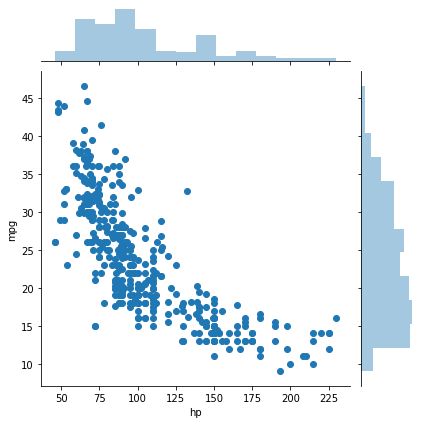

In [2]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show()


## Plotting joint distributions (2)
The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

- kind='scatter' uses a scatter plot of the data points
- kind='reg' uses a regression plot (default order 1)
- kind='resid' uses a residual plot
- kind='kde' uses a kernel density estimate of the joint distribution
- kind='hex' uses a hexbin plot of the joint distribution

For this exercise, you will again use sns.jointplot() to display the joint distribution of the hp and mpg columns of the auto DataFrame. This time, you will use kind='hex' to generate a hexbin plot of the joint distribution.

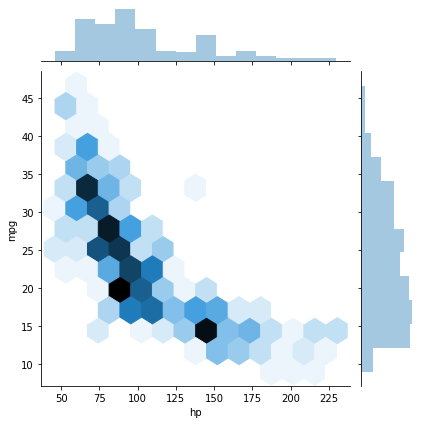

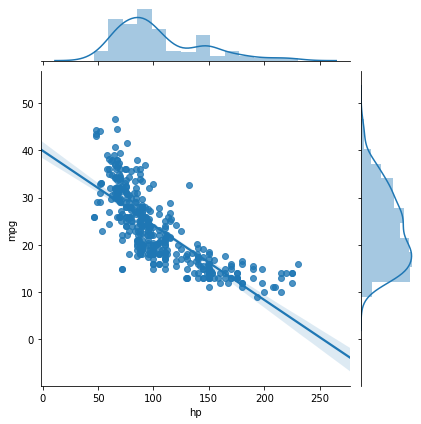

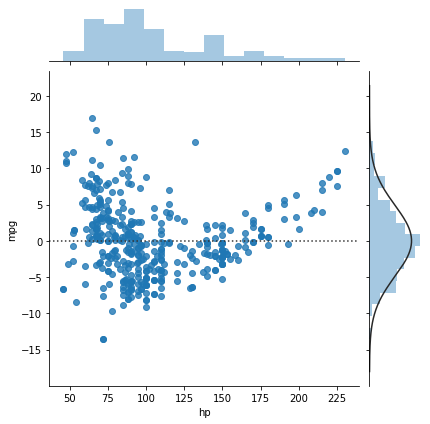

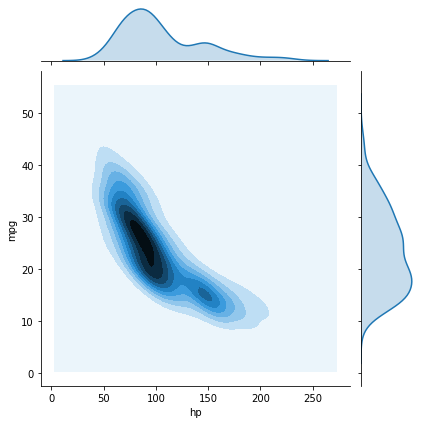

In [4]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')
sns.jointplot(x='hp', y='mpg', data=auto, kind='reg')
sns.jointplot(x='hp', y='mpg', data=auto, kind='resid')
sns.jointplot(x='hp', y='mpg', data=auto, kind='kde')

# Display the plot
plt.show()


## Plotting distributions pairwise (1)
Data sets often contain more than two continuous variables. The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

In this exercise, you will use a DataFrame auto comprising only three columns from the original auto-mpg data set.

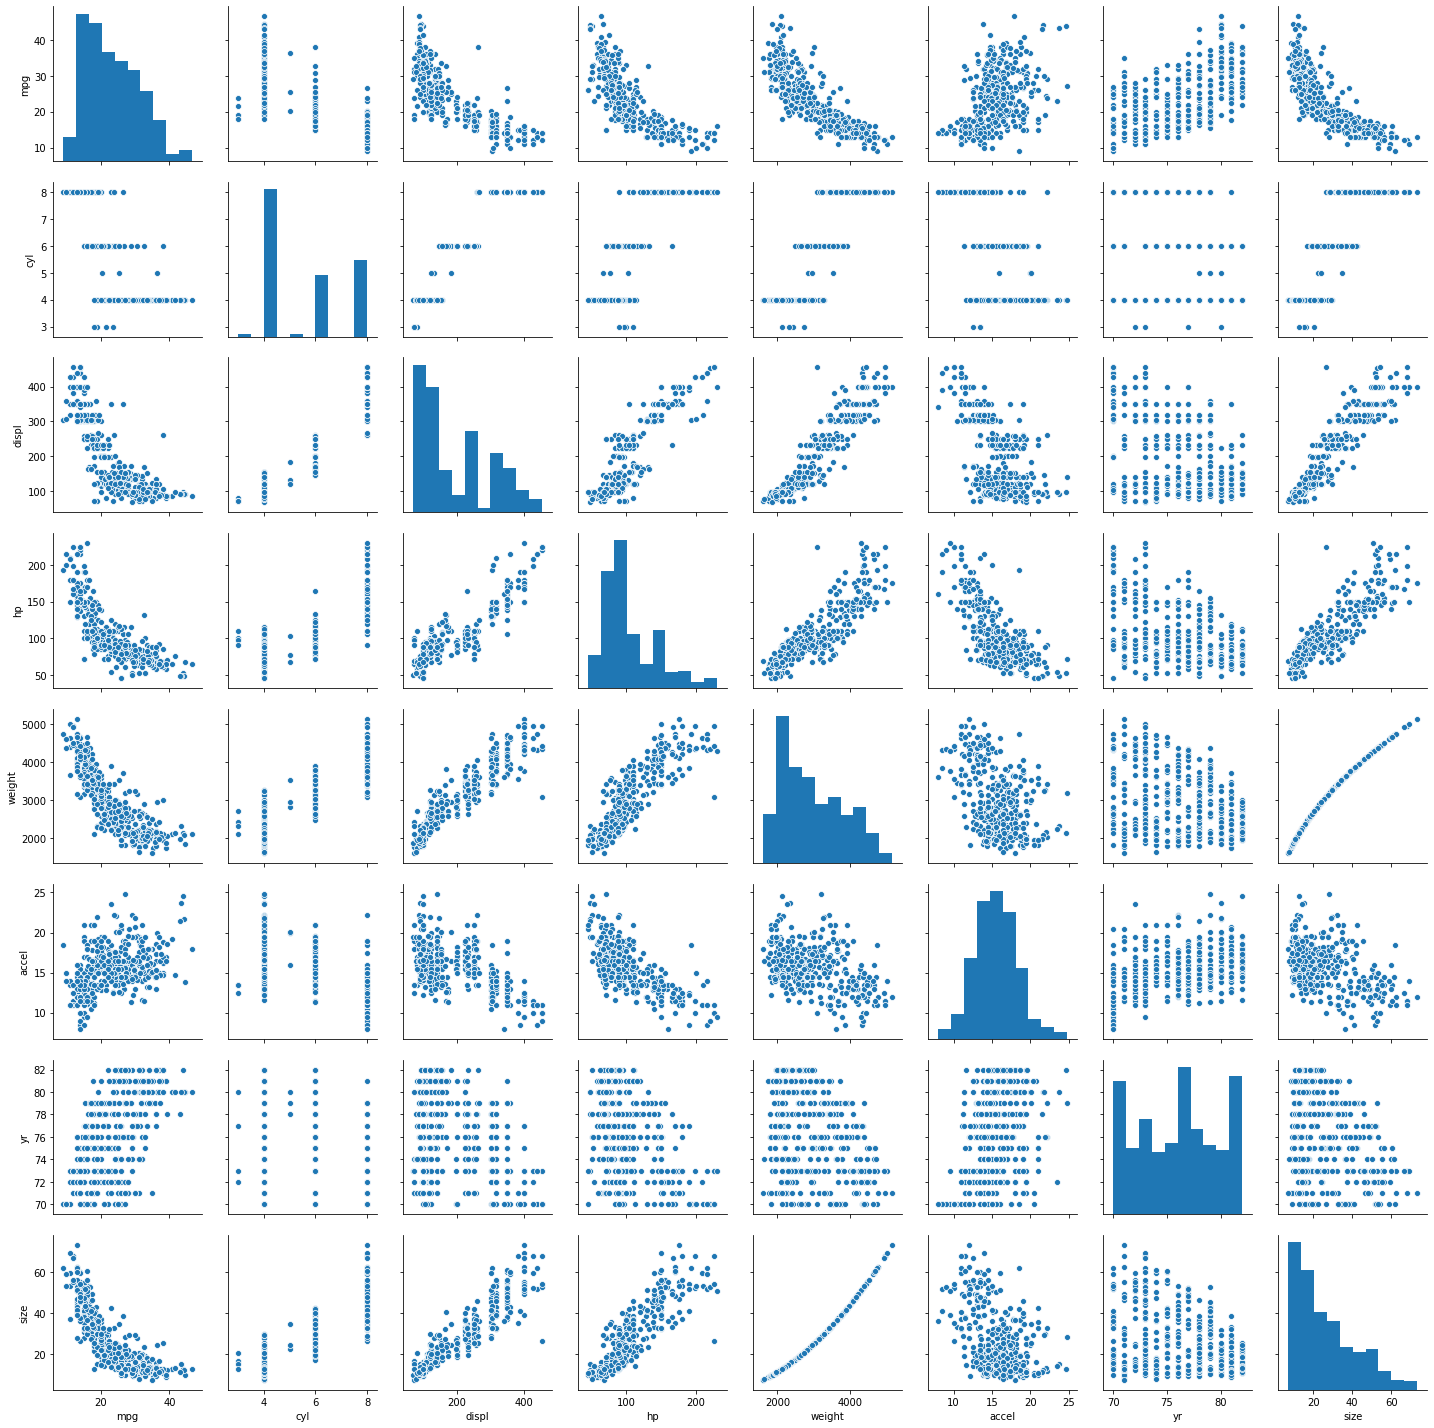

In [5]:
sns.pairplot(auto)

## Plotting distributions pairwise (2)
In this exercise, you will generate pairwise joint distributions again. This time, you will make two particular additions:

- You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument kind='reg' (where 'reg' means 'regression'). Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.
- You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument hue specifying the 'origin'.

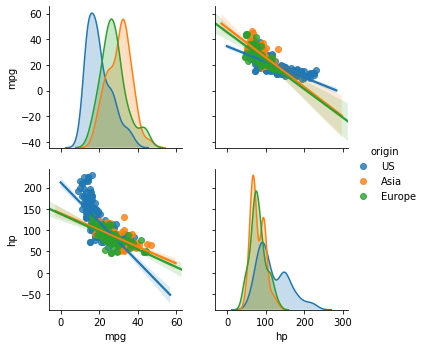

In [7]:
sns.pairplot(auto[['mpg', 'hp', 'origin']], kind='reg', hue='origin')

## Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the auto-mpg dataset. You do not have to know here how the covariance matrix is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

In [10]:
cov_matrix = auto.corr()

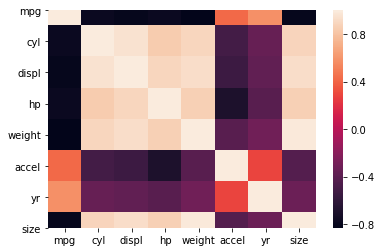

In [11]:
sns.heatmap(cov_matrix)

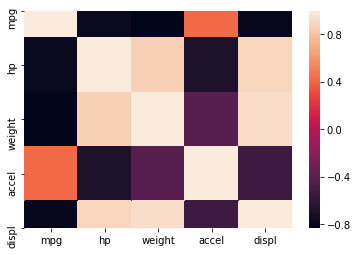

In [25]:
cov_matrix = auto[["mpg", "hp", "weight", "accel", "displ"]].corr()
sns.heatmap(cov_matrix)